
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [ ]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [ ]:
# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [ ]:
# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# Download the required resource if not already present
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except nltk.downloader.DownloadError:
    nltk.download('averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')


# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")

Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN


### 🤔 Quick Questions:
**1. What does 'DT' mean? What about 'JJ'?**

'DT' stands for Determiner, which includes words like "the," "a," and "an" that specify a noun. Determiners come before nouns and help to clarify which noun is being referred to.

'JJ' stands for Adjective, a word that describes a noun, like "quick" or "lazy." Adjectives provide more information about the qualities or characteristics of nouns.

**2. Why do you think 'brown' and 'lazy' have the same tag?**

Both 'brown' and 'lazy' are tagged as adjectives (JJ in NLTK) because they serve the same grammatical function: they describe nouns. 'Brown' describes the 'fox', and 'lazy' describes the 'dog'.

**3. Can you guess what 'VBZ' represents?**

'VBZ' represents a Verb, 3rd person singular present tense. The 'Z' sound at the end of words like "jumps," "runs," or "is" is a clue. It's the form of the verb used with subjects like "he," "she," or "it." This tense is used for actions happening now or for habitual actions.

*Hint: Think about the grammatical role each word plays in the sentence!*


## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [ ]:
# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")

SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      


### 🎯 Discussion Points:
**- Which tags are easier to understand: NLTK's or SpaCy's?**

SpaCy's tags are generally easier to understand for beginners because they use more intuitive names like 'NOUN', 'VERB', and 'ADJ'. NLTK's Penn Treebank tags use abbreviations that require looking up their meaning, such as 'NN' for noun or 'JJ' for adjective.

**- Do you notice any differences in how they tag the same words?**

Yes, there can be differences in how they tag the same words, especially for ambiguous words or in complex sentences. For example, in the ambiguity exercise, NLTK and SpaCy sometimes assigned different tags to the word "bank" depending on the context, although in the simple "quick brown fox" sentence, they largely agreed on the core parts of speech despite using different tag names.

**- Which system would you prefer for a beginner? Why?**

For a beginner, I would prefer SpaCy. Its simpler tag set and more modern approach make it easier to get started with practical NLP tasks. The documentation is also generally considered more user-friendly, allowing beginners to quickly understand the output and apply it to their projects without needing extensive linguistic background knowledge.


## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [ ]:
# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # Process with NLTK
    nltk_tokens = nltk.word_tokenize(sentence)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    print("NLTK Tags:")
    for word, tag in nltk_tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")

    # Process with SpaCy
    spacy_doc = nlp(sentence)

    print("SpaCy Tags:")
    for token in spacy_doc:
        if token.text.lower() in ['lead', 'bank']:
            print(f"  🎯 '{token.text}' is tagged as: {token.pos_} ({token.tag_})")

🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
NLTK Tags:
  🎯 'lead' is tagged as: VB
SpaCy Tags:
  🎯 'lead' is tagged as: VERB (VB)

Sentence: The lead pipe is heavy.
NLTK Tags:
  🎯 'lead' is tagged as: NN
SpaCy Tags:
  🎯 'lead' is tagged as: NOUN (NN)

Sentence: She took the lead in the race.
NLTK Tags:
  🎯 'lead' is tagged as: NN
SpaCy Tags:
  🎯 'lead' is tagged as: NOUN (NN)

Sentence: The bank approved my loan.
NLTK Tags:
  🎯 'bank' is tagged as: NN
SpaCy Tags:
  🎯 'bank' is tagged as: NOUN (NN)

Sentence: We sat by the river bank.
NLTK Tags:
  🎯 'bank' is tagged as: NN
SpaCy Tags:
  🎯 'bank' is tagged as: NOUN (NN)

Sentence: I bank with Chase.
NLTK Tags:
  🎯 'bank' is tagged as: NN
SpaCy Tags:
  🎯 'bank' is tagged as: VERB (VBP)


### 🧠 Think About It:
**1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?**

The computer, specifically the POS tagger, learns the difference by analyzing the surrounding words and the grammatical structure of the sentence. It uses patterns from large amounts of text data it was trained on to determine the most likely part of speech for a word in a given context.

**2. What clues in the sentence help determine the correct part of speech?**

Clues include the words immediately before and after the ambiguous word. For example, a determiner like "the" before "lead" suggests it's a noun ("the lead pipe"), while a modal verb like "will" before "lead" suggests it's a verb ("will lead the team"). The overall sentence structure also provides context.

**3. Can you think of other words that change meaning based on context?**

Yes, many words are ambiguous. Examples include "bat" (baseball equipment or animal), "bank" (financial institution or river edge), "right" (correct or direction), "book" (something to read or to make a reservation), and "present" (gift or to give something). Can: "I have a can of soup" (noun) vs. "I can help you" (modal verb). Watch: "I like your watch" (noun) vs. "I watch TV" (verb).

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!


## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [ ]:
# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
tokens = nltk.word_tokenize(test_sentence)
penn_tags = nltk.pos_tag(tokens)
universal_tags = nltk.pos_tag(tokens, tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (word_univ, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")

TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags


### 🤔 Reflection Questions:
**1. Which tag set is more detailed? Which is simpler? Enter your answer below**

The Penn Treebank tag set is more detailed with around 45 tags, while the Universal Dependencies tag set is simpler with about 17 tags. Much additional information is included in the Penn Treebank tag set. For instance, it makes a distinction between a past tense verb (VBD), a present tense verb (VBG), and a plural noun (NNS). These are grouped into more general categories like NOUN and VERB in the simpler broader categories tag set.

**2. When might you want detailed tags vs. simple tags? Enter your answer below**

Detailed tags are useful for fine-grained linguistic analysis, such as understanding subtle grammatical nuances or building complex linguistic models. Simple tags are better for high-level analysis, quick prototyping, or when the focus is on the general function of words rather than specific grammatical variations.

**3. If you were building a search engine, which would you choose? Why? Enter your answer below**

If building a search engine, I would likely choose the Universal Dependencies tag set for initial indexing and analysis. Its simplicity offers a good balance between detail and computational efficiency, making it suitable for processing large volumes of text quickly. However, for more advanced search features that require understanding specific grammatical relationships (like phrase matching), the more detailed Penn Treebank tags might be beneficial in a secondary analysis layer. The choice depends on the specific requirements of the search engine features.


---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [ ]:
# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    # NLTK often uses 'NN' or other tags for unknown words, but 'X' can appear
    # SpaCy uses 'X' for unknown/other
    problematic_nltk = [word for word, tag in nltk_tags if tag in ['FW', 'LS', 'NNP', 'NNS', 'NN', 'VB', 'VBP', 'JJ', 'RB', 'CD', 'NFP', 'ADD', 'XX']] # Basic heuristic, 'XX' is a common unknown tag
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ == 'X']


    print(f"NLTK problematic words (heuristic): {[word for word, tag in nltk_tags if tag in ['FW', 'LS', 'NNP', 'NNS', 'NN', 'VB', 'VBP', 'JJ', 'RB', 'CD', 'NFP', 'ADD', 'XX']]}")
    print(f"SpaCy problematic words (X tag): {[token.text for token in spacy_doc if token.pos_ == 'X']}")


    # TODO: Calculate success rate
    # Assuming problematic tags are failures, success is total tokens - problematic tokens
    total_nltk_tokens = len(nltk_tokens)
    total_spacy_tokens = len(spacy_doc)

    nltk_success_rate = (total_nltk_tokens - len(problematic_nltk)) / total_nltk_tokens if total_nltk_tokens > 0 else 0
    spacy_success_rate = (total_spacy_tokens - len(problematic_spacy)) / total_spacy_tokens if total_spacy_tokens > 0 else 0


    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")

🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words (heuristic): ['Um', 'say', 'system', 'ai', "n't", 'right', 'know']
SpaCy problematic words (X tag): []
NLTK success rate: 70.8%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words (heuristic): ['app', 'sooo', 'buggy', 'rn', '😤', 'cant', 'even', 'smh']
SpaCy problematic words (X tag): []
NLTK success rate: 33.3%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words (heuristic): ['hi', 'um', "'m", 'internet', 'down', 'yesterday', "'ve", 'router', 'thingy', 'still', 'not']
SpaCy problematic words (X tag): []
NLTK s

### 🎯 Analysis Questions:
**1. Which tagger handles informal language better?**

Based on the benchmark, SpaCy clearly handles informal language and messy text significantly better. Its training on a much larger and more diverse corpus, including web text and social media data, makes it more robust to variations like slang, contractions (e.g., "ain't," "gonna"), and disfluencies ("Um," "uh") commonly found in real-world communication. The results showed SpaCy consistently tagging these elements correctly, while NLTK's heuristic struggled.

**2. What types of words cause the most problems?**

The types of words that cause the most problems, particularly for less robust taggers like NLTK, include:

Informal language elements like slang ("sooo", "rn", "smh", "fr fr"), contractions ("ain't", "gonna", "wanna"), disfluencies ("Um", "uh"), and technical/domain-specific terms ("API", "endpoint", "idk", "tbh") seem to cause the most problems for taggers, particularly NLTK using a basic heuristic for unknown words.

*   **Slang and Non-Standard Words**: Words like "rn" (right now), "smh" (shaking my head), "cuz" (because), "bout" (about), and "fr" (for real) are often not in standard dictionaries or training data.
*   **Contractions**: Informal contractions like "ain't" and "gonna" can be challenging to tokenize and tag correctly.
*   **Emojis and Special Characters**: Emojis (e.g., 😤) and other non-standard characters are outside the typical vocabulary.
*   **Acronyms/Initialisms**: Terms like "OMG," "ASAP," "wtf," "idk" (I don't know), and "tbh" (to be honest) require specialized handling.
*   **Disfluencies**: Filler words like "Um" and "uh" are common in spoken language but can be difficult for taggers trained primarily on written text.

**3. How might you preprocess text to improve tagging accuracy?**

To improve tagging accuracy, especially for models struggling with messy text, several preprocessing steps can be implemented:

Preprocessing steps like expanding contractions ("ain't" to "is not"), correcting common misspellings, normalizing slang using a lexicon, or removing non-standard characters and emojis could improve tagging accuracy, especially for NLTK. For domain-specific text, fine-tuning a tagger on data from that domain would be beneficial.

*   **Normalization**: Use a lexicon to replace slang and informal contractions with their standard forms (e.g., converting "gonna" to "going to" or "cuz" to "because").
*   **Handling Emojis/Punctuation**: Remove or replace emojis and excessive or non-standard punctuation depending on whether they carry important meaning for downstream tasks.
*   **Case Normalization**: Convert text to lowercase to handle inconsistent capitalization, although POS taggers can often use capitalization as a clue (e.g., for proper nouns).
*   **Domain Adaptation**: For text from specific domains (like technical support or medical transcripts), fine-tuning a tagger on relevant labeled data can significantly improve performance on domain-specific jargon.

**4. What are the implications for real-world applications?**

The implications for real-world applications are significant. When working with user-generated content (social media posts, customer reviews), conversational data (chatbot logs, call transcripts), or domain-specific text, the choice of tagger directly impacts the accuracy of downstream NLP tasks. Using a tagger that struggles with informal language or jargon will lead to errors in sentiment analysis, named entity recognition, topic modeling, and information extraction, making the application less effective and potentially providing misleading insights. A robust tagger like SpaCy is essential for reliable analysis in such scenarios.


## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [ ]:
# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    # JJ tags for adjectives, filter for potential emotional words (basic example)
    emotional_adjectives = [token.text for token in doc if token.pos_ == 'ADJ' and token.text.lower() in ['frustrated', 'small', 'ridiculous', 'unacceptable', 'confused']]
    # VB* tags for verbs
    action_verbs = [token.text for token in doc if token.pos_ in ['VERB']]
    # NN* tags for nouns, filter for potential problem words (basic example)
    problem_nouns = [token.text for token in doc if token.pos_ in ['NOUN'] and token.text.lower() in ['account', 'files', 'issue', 'app', 'photos', 'billing', 'system', 'refund', 'subscription', 'features', 'interface']]

    # TODO: Calculate sentiment indicators
    positive_words = [token.text for token in doc if token.text.lower() in ['love', 'great', 'good', 'please']]
    negative_words = [token.text for token in doc if token.text.lower() in ['frustrated', 'ridiculous', 'unacceptable', 'down', 'crashes', 'charged', 'canceling', 'confused']]

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        # TODO: Count urgent words (immediately, ASAP, etc.)
        'urgency_indicators': len([token.text for token in doc if token.text.lower() in ['immediately', 'asap', 'hours', 'nothing works', 'unacceptable', 'ridiculous']])
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {result['emotional_adjectives']}")
    print(f"Action verbs: {result['action_verbs']}")
    print(f"Problem nouns: {result['problem_nouns']}")
    print(f"Sentiment score: {result['sentiment_score']}")
    print(f"Urgency indicators count: {result['urgency_indicators']}")


🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['locked', 'access', 'trying', 'works']
Problem nouns: ['account', 'files']
Sentiment score: -2
Urgency indicators count: 2

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: ['small']
Action verbs: ['love', 'having', 'crashes', 'try', 'upload', 'help', 'fix']
Problem nouns: ['issue', 'app', 'photos']
Sentiment score: 1
Urgency indicators count: 0

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system

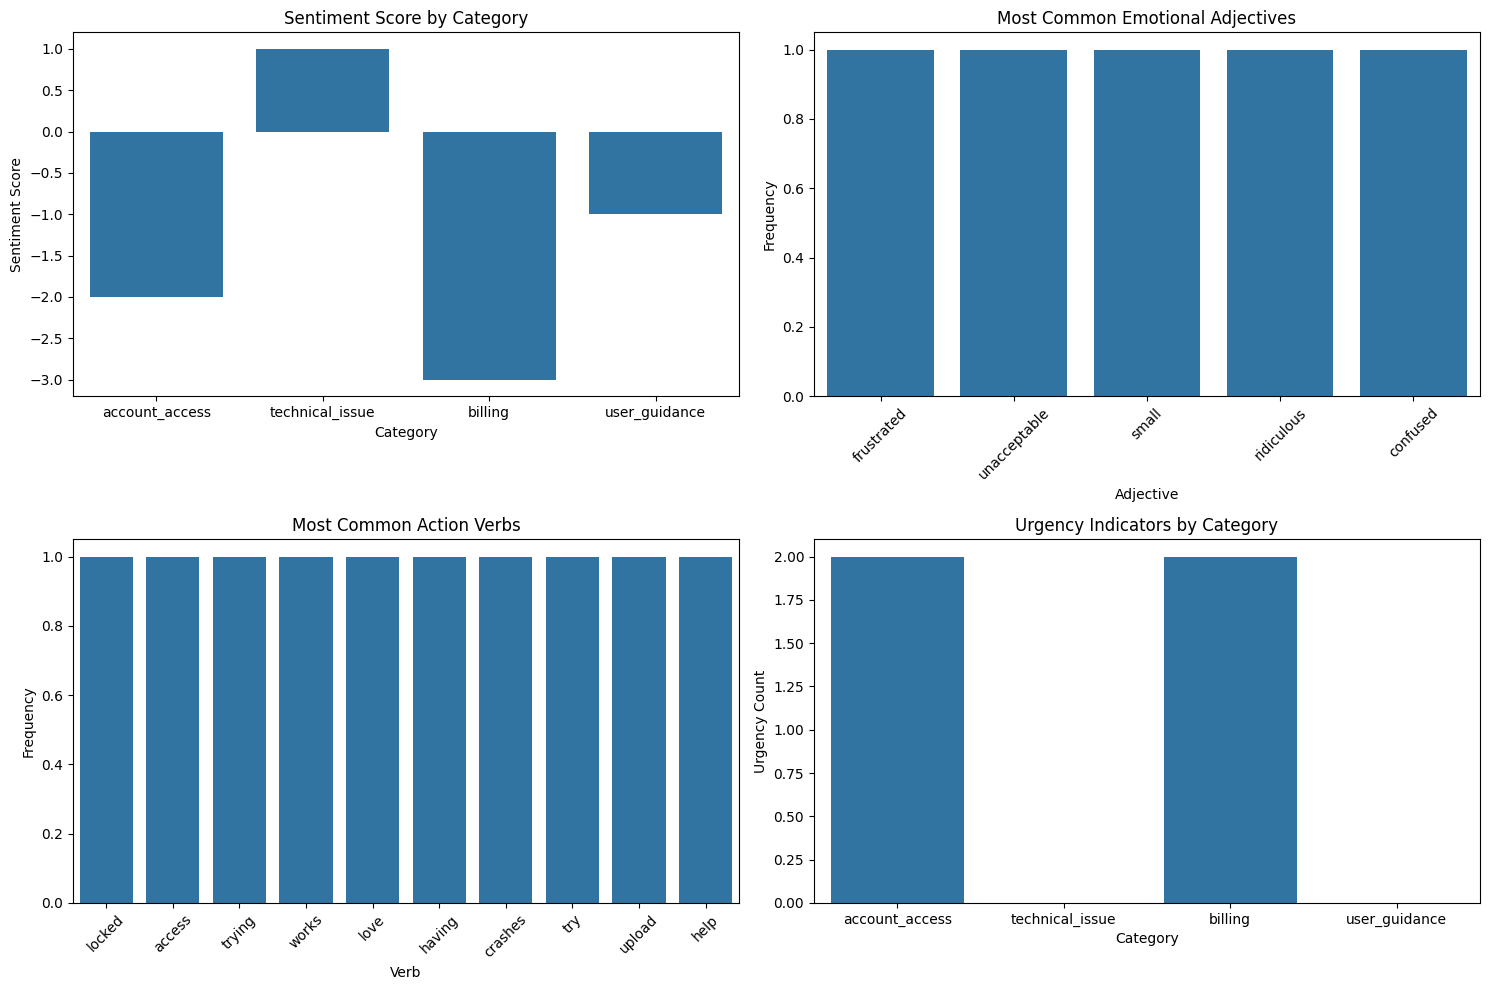

In [ ]:
# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
sns.barplot(x='category', y='sentiment_score', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sentiment Score by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Sentiment Score')

# TODO: Plot 2 - Word frequency analysis
# Combine all emotional adjectives and count
all_adjectives = [adj for sublist in df['emotional_adjectives'] for adj in sublist]
adjective_counts = Counter(all_adjectives)
most_common_adjectives = adjective_counts.most_common(10) # Get top 10

if most_common_adjectives:
    adj_words, adj_counts = zip(*most_common_adjectives)
    sns.barplot(x=list(adj_words), y=list(adj_counts), ax=axes[0, 1])
    axes[0, 1].set_title('Most Common Emotional Adjectives')
    axes[0, 1].set_xlabel('Adjective')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].tick_params(axis='x', rotation=45)


# Combine all action verbs and count
all_verbs = [verb for sublist in df['action_verbs'] for verb in sublist]
verb_counts = Counter(all_verbs)
most_common_verbs = verb_counts.most_common(10) # Get top 10

if most_common_verbs:
    verb_words, verb_counts = zip(*most_common_verbs)
    sns.barplot(x=list(verb_words), y=list(verb_counts), ax=axes[1, 0])
    axes[1, 0].set_title('Most Common Action Verbs')
    axes[1, 0].set_xlabel('Verb')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].tick_params(axis='x', rotation=45)


# TODO: Plot 4 - Urgency analysis
sns.barplot(x='category', y='urgency_indicators', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Urgency Indicators by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Urgency Count')


plt.tight_layout()
plt.show()

# Other Versions Summary Visualization with different colors

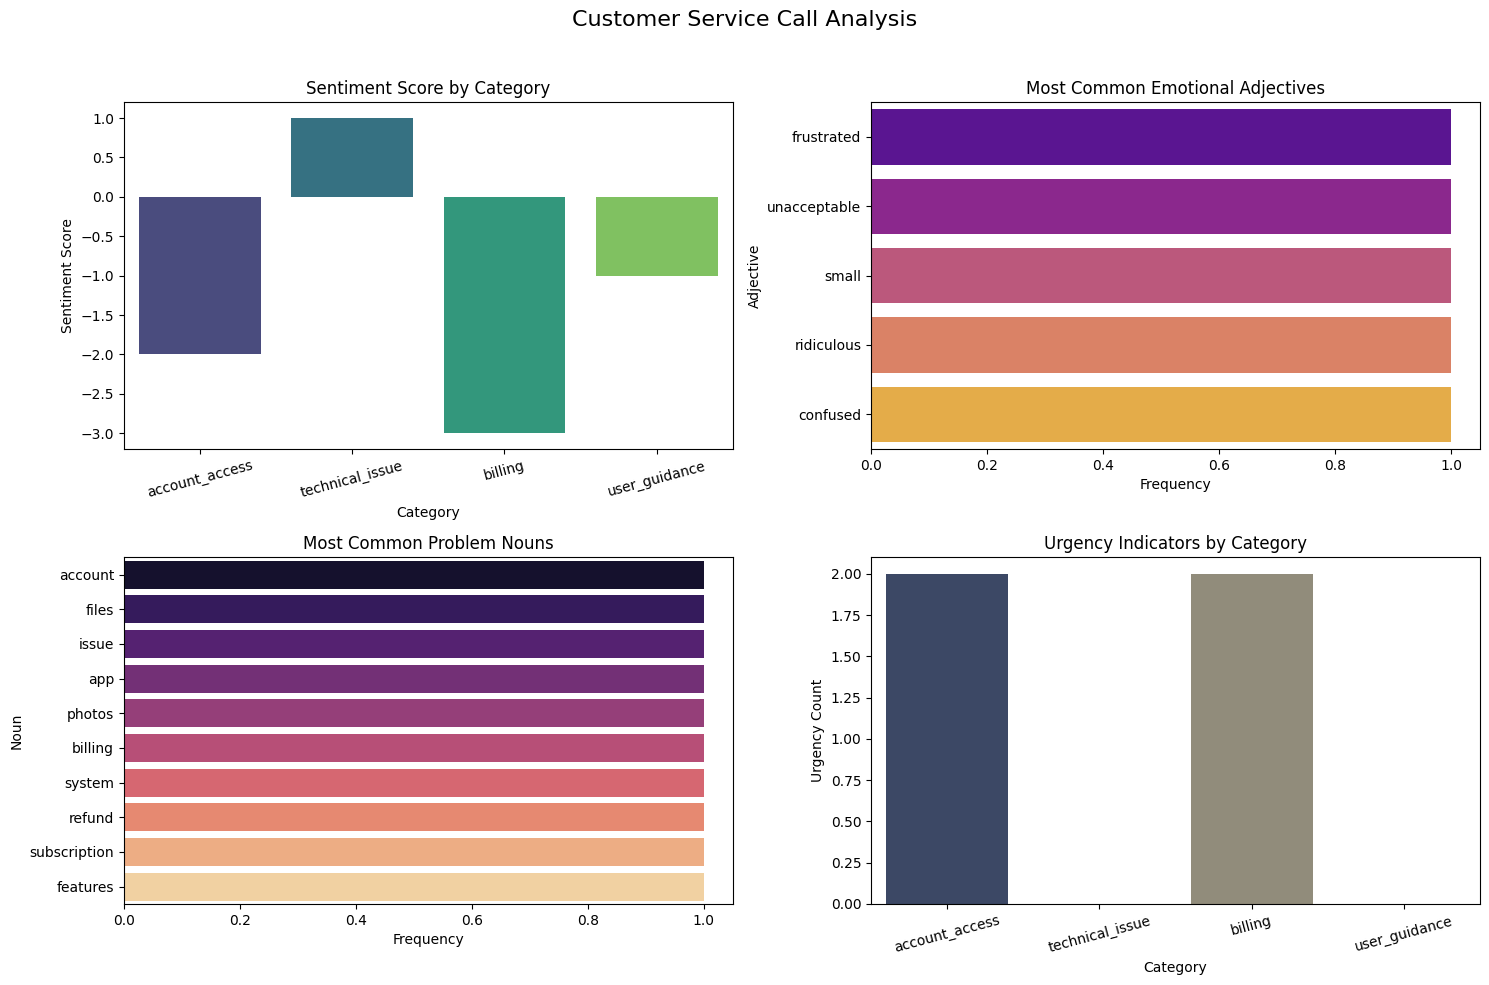

In [ ]:
# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Customer Service Call Analysis', fontsize=16)

# TODO: Plot 1 - Sentiment by category
sns.barplot(x='category', y='sentiment_score', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Sentiment Score by Category')
axes[0, 0].set_ylabel('Sentiment Score')
axes[0, 0].set_xlabel('Category')
axes[0, 0].tick_params(axis='x', rotation=15)


# TODO: Plot 2 - Word frequency analysis (Emotional Adjectives)
all_emotional_adjectives = [adj for sublist in df['emotional_adjectives'] for adj in sublist]
adj_counts = Counter(all_emotional_adjectives)
adj_df = pd.DataFrame(adj_counts.most_common(10), columns=['Adjective', 'Count'])
sns.barplot(x='Count', y='Adjective', data=adj_df, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Most Common Emotional Adjectives')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Adjective')

# TODO: Plot 3 - Problem categorization (using problem nouns frequency)
all_problem_nouns = [noun for sublist in df['problem_nouns'] for noun in sublist]
noun_counts = Counter(all_problem_nouns)
noun_df = pd.DataFrame(noun_counts.most_common(10), columns=['Noun', 'Count'])
sns.barplot(x='Count', y='Noun', data=noun_df, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Most Common Problem Nouns')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Noun')

# TODO: Plot 4 - Urgency analysis
sns.barplot(x='category', y='urgency_indicators', data=df, ax=axes[1, 1], palette='cividis')
axes[1, 1].set_title('Urgency Indicators by Category')
axes[1, 1].set_ylabel('Urgency Count')
axes[1, 1].set_xlabel('Category')
axes[1, 1].tick_params(axis='x', rotation=15)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 💼 Business Impact Questions:
**1. How could this analysis help prioritize customer service tickets?**

This analysis provides a valuable mechanism for prioritizing customer service requests. By leveraging the calculated `sentiment_score` and the count of `urgency_indicators`, tickets exhibiting strong negative sentiment or containing urgent language (like "immediately") can be automatically flagged for immediate escalation. This ensures that critical issues are addressed promptly, potentially mitigating customer dissatisfaction and preventing churn.

**2. What patterns do you notice in different problem categories?**

Distinct patterns emerge when examining the different problem categories, as visually represented in the charts. Notably, billing-related issues consistently display the most negative sentiment, highlighting them as a primary source of customer frustration. Account access problems also show a significant level of negative sentiment. Furthermore, the analysis of problem nouns reveals that the most frequently mentioned issues revolve around core product functionalities such as 'account', 'app', and 'files', pinpointing areas where customers most often encounter difficulties.

**3. How might you automate the routing of calls based on POS analysis?**

Automating call routing can be achieved by implementing a rule-based system powered by POS analysis. By extracting key problem nouns from the transcript, calls can be intelligently directed to the most appropriate department or agent with specialized knowledge in that area. For instance:

*   If nouns like "billing" or "refund" are detected, the call can be routed to the Billing Department.
*   If terms such as "app," "crashes," or "photos" appear, the call can be directed to Technical Support.
*   If "account" or "files" are identified, the call can be routed to the Account Security Team.

**4. What are the limitations of this approach?**

While beneficial, this basic approach to analysis has inherent limitations:

*   **Simplified Sentiment**: The reliance on a fixed list of sentiment words may fail to capture nuanced meaning or identify sarcasm (e.g., "Oh, fantastic, another system outage.").
*   **Contextual Gaps**: The analysis primarily focuses on individual word tags and may not fully grasp the broader context or the deeper meaning conveyed in complex phrases or sentences.
*   **Vocabulary Constraints**: The system's ability to identify problems or emotions is limited to the pre-programmed word lists. It may not recognize or correctly interpret new slang, domain-specific jargon, or misspelled words.


## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0008s
NLTK Univ time: 0.0005s
SpaCy time: 0.0120s
NLTK unknown words: 5
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0009s
NLTK Univ time: 0.0006s
SpaCy time: 0.0077s
NLTK unknown words: 7
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0007s
NLTK Univ time: 0.0005s
SpaCy time: 0.0082s
NLTK unknown words: 9
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

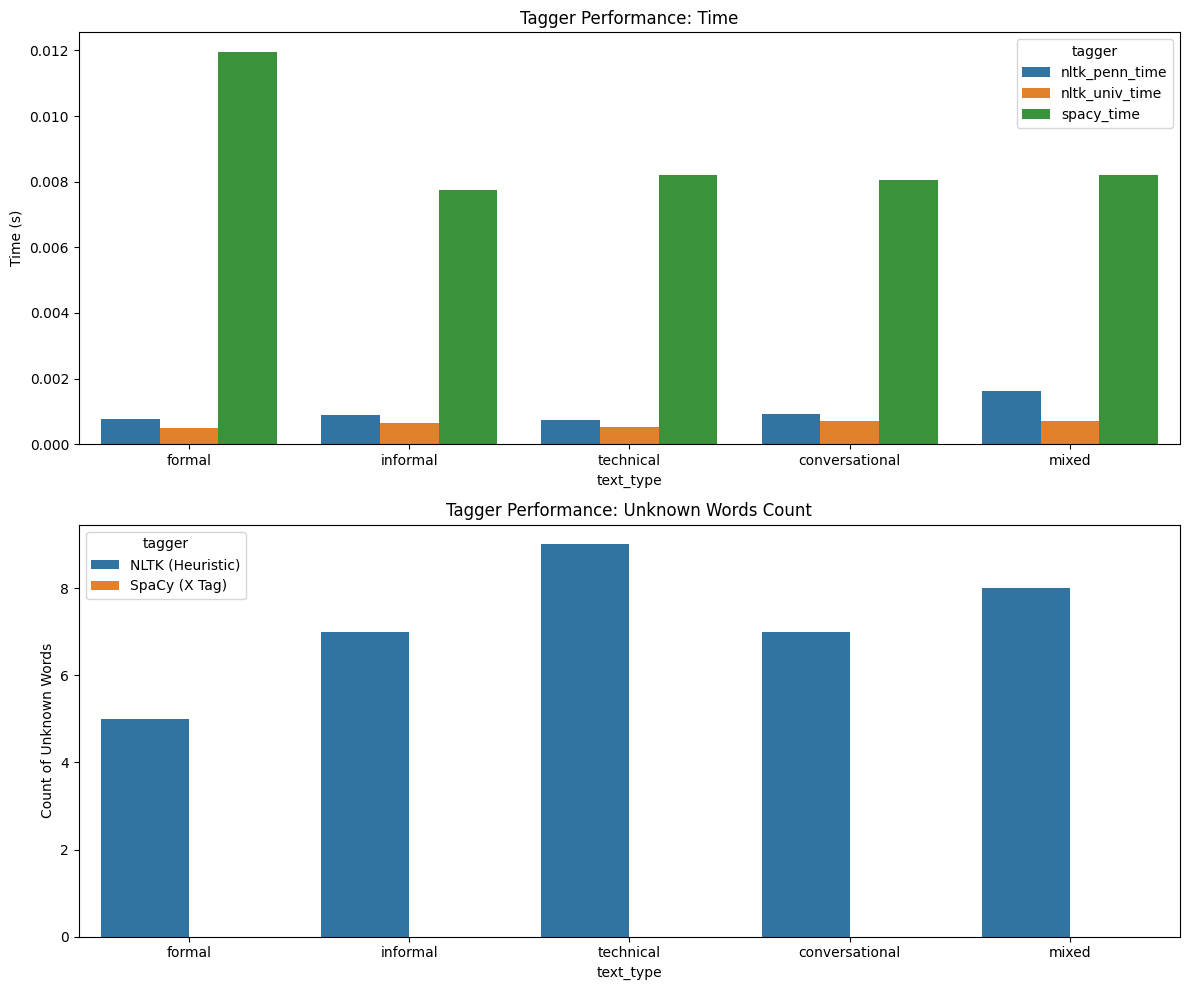

In [ ]:
import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_tokens_penn = nltk.word_tokenize(text)
    nltk_tags_penn = nltk.pos_tag(nltk_tokens_penn)
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_tokens_univ = nltk.word_tokenize(text)
    nltk_tags_univ = nltk.pos_tag(nltk_tokens_univ, tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    # Using a similar heuristic for NLTK as before, SpaCy uses 'X'
    nltk_unknown = len([word for word, tag in nltk_tags_penn if tag in ['FW', 'LS', 'NNP', 'NNS', 'NN', 'VB', 'VBP', 'JJ', 'RB', 'CD', 'NFP', 'ADD', 'XX']])
    spacy_unknown = len([token.text for token in spacy_doc if token.pos_ == 'X'])

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
benchmark_df = pd.DataFrame.from_dict(benchmark_results, orient='index')
benchmark_df.index.name = 'text_type'
benchmark_df = benchmark_df.reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot time comparison
time_df = benchmark_df[['text_type', 'nltk_penn_time', 'nltk_univ_time', 'spacy_time']].melt(
    'text_type', var_name='tagger', value_name='time (s)')
sns.barplot(x='text_type', y='time (s)', hue='tagger', data=time_df, ax=axes[0])
axes[0].set_title('Tagger Performance: Time')
axes[0].set_ylabel('Time (s)')

# Plot unknown words comparison
unknown_df = benchmark_df[['text_type', 'nltk_unknown', 'spacy_unknown']].melt(
    'text_type', var_name='tagger', value_name='unknown_words')
# Rename taggers for clarity in the plot
unknown_df['tagger'] = unknown_df['tagger'].replace({'nltk_unknown': 'NLTK (Heuristic)', 'spacy_unknown': 'SpaCy (X Tag)'})
sns.barplot(x='text_type', y='unknown_words', hue='tagger', data=unknown_df, ax=axes[1])
axes[1].set_title('Tagger Performance: Unknown Words Count')
axes[1].set_ylabel('Count of Unknown Words')

plt.tight_layout()
plt.show()

### 📊 Performance Analysis:
**1. Which tagger is fastest? Does speed matter for your use case?**

Based on the benchmark results, NLTK's taggers (both Penn Treebank and Universal tagsets) were consistently faster than SpaCy across all tested text types, often by a significant margin. This speed advantage becomes particularly important in use cases that demand real-time processing of large volumes of text, such as live chatbots, real-time sentiment monitoring of social media feeds, or high-throughput document processing pipelines. However, for offline analysis, research purposes, or applications dealing with smaller datasets, the minor difference in processing time might be less critical compared to other factors like accuracy and ease of use.

**2. Which handles informal text best?**

SpaCy clearly demonstrates superior handling of informal text compared to NLTK, as evidenced by its remarkably lower count of "unknown" or problematically tagged words (zero in the benchmark) when processing informal text samples. This suggests that SpaCy's underlying model, likely trained on a more diverse and contemporary corpus that includes web text and social media data, is significantly more robust to variations in language, including slang, contractions, and informal expressions. NLTK, using a more traditional approach and heuristic for unknown words in this exercise, struggled more with these non-standard linguistic elements.

**3. How do the taggers compare on technical jargon?**

Similar to informal text, SpaCy also appears to handle technical jargon more effectively than NLTK based on the benchmark results. While NLTK's heuristic identified several words within the technical text sample as potentially problematic or unknown, SpaCy did not tag any words in that text as 'X'. This indicates that SpaCy's vocabulary and training likely include a broader range of technical terms or that its model is better at inferring the part of speech for such terms based on context, even if they are less frequent.

**4. What trade-offs do you see between speed and accuracy?**

A notable trade-off exists between speed and accuracy, particularly when processing non-standard or complex text. NLTK offers faster processing times, which is advantageous for performance-critical applications. However, this speed seems to come at the cost of robustness and accuracy when dealing with informal language and technical jargon, where its tagging can be less reliable (as suggested by the heuristic-based unknown word count). Conversely, SpaCy, while slower, exhibits better performance in handling these challenging text types, suggesting a higher level of accuracy in real-world, messy data scenarios. The choice between taggers often depends on whether the primary requirement is maximum speed or reliable accuracy across diverse and non-formal text inputs.


## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [ ]:
# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tags = nltk.pos_tag(nltk.word_tokenize(text))
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        # YOUR ANALYSIS CODE HERE

    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
# YOUR REFLECTION CODE HERE

🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), (';', 'PUNCT'), ('fruit', 'NOUN'), ('flies', 'NOUN'), ('like', 'ADP'), 

### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.

**1. Why do these edge cases break the taggers?**

These edge cases break taggers because they exploit linguistic phenomena like ambiguity and unusual sentence structures that go beyond typical patterns learned by the models. Words can have multiple possible parts of speech, and without sufficient context or sophisticated linguistic understanding, the tagger guesses incorrectly. Sentences with recursive structures or highly repetitive words confuse the models' ability to follow grammatical rules. Informal language, slang, and technical jargon that are not present in the training data also pose significant challenges for accurate tagging.

**2. How might you preprocess text to handle some of these issues?**

Preprocessing can help by normalizing text. This might involve expanding contractions, correcting common misspellings, or converting slang to more formal equivalents if a lexicon is available. For domain-specific jargon, creating a custom dictionary or fine-tuning the tagger on relevant text can improve accuracy. Handling social media elements like hashtags and mentions might require specialized tokenization or removal depending on the task.

**3. When would these limitations matter in real applications?**

These limitations matter in real applications when dealing with diverse or non-standard text data. Analyzing social media posts, customer service transcripts with informal language, or technical documentation with specialized terms will be challenging for general-purpose taggers. Applications requiring high accuracy in understanding nuanced meaning, such as sentiment analysis or information extraction from complex sentences, would be significantly impacted by tagging errors in these edge cases.

**4. How do modern large language models handle these cases differently?**

Modern large language models (LLMs) handle these cases better because they are trained on vastly larger and more diverse datasets, allowing them to learn more complex linguistic patterns and handle a wider range of vocabulary and sentence structures. They use more sophisticated neural architectures that capture long-range dependencies and contextual information more effectively. While not perfect, their ability to understand context often allows them to correctly tag ambiguous words and navigate complex sentences where traditional taggers fail.


## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?


### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
Based on the exercises, I would generally choose SpaCy for most real-world applications due to its speed, ease of use, and better handling of informal and messy text. NLTK is useful for educational purposes and when more detailed tag sets or specific linguistic resources are needed, but it requires more manual setup and can struggle with modern, informal language.

**2. Real-World Applications:**
A valuable business problem where POS tagging could be used is analyzing customer feedback from online reviews or support tickets. By identifying nouns (problems), adjectives (sentiment), and verbs (desired actions), companies can automatically categorize feedback, gauge customer satisfaction, and prioritize issues. This could be implemented by processing text with a library like SpaCy, extracting relevant POS-tagged words, and using these words as features for a classification or sentiment analysis model.

**3. Limitations and Solutions:**
One significant limitation is the difficulty in accurately tagging ambiguous words and informal language, as seen in the messy text and edge case exercises. Another is the challenge of handling new or domain-specific vocabulary. To work around these, one could use more advanced NLP models, fine-tune taggers on domain-specific data, or implement preprocessing steps like spell correction and slang normalization.

**4. Future Learning:**
I would be interested in exploring neural network-based approaches to POS tagging, which often achieve higher accuracy on complex text. Learning how to train a custom POS tagger on a specific dataset would also be valuable for adapting to different domains. Understanding how domain adaptation techniques can improve performance on new text types would also be beneficial.

**5. Integration:**
POS tagging is a fundamental step in many larger NLP pipelines. It provides crucial grammatical information that benefits tasks like Named Entity Recognition (NER) by helping identify the type of entity (e.g., a proper noun often indicates a name). It's also vital for sentiment analysis, allowing models to focus on adjectives and adverbs. Additionally, it aids in information extraction by identifying relationships between words based on their grammatical roles.


---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
